# Sentiment analysis for tweets (1 Workshop AI)
#### Maicol Carvajal - Cristian Velasco - Bryan Bohorquez - Camilo Ocampo

### Using the next dataset we want to analyze sentiments: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset?resource=download

## Self made questions for the end:
#### Which feeling predominate in the whole dataset?
#### More than the 30% of the tweets contain negative sentiments?
#### Which model can get a higher accuracy / precission? (Between logistic regression and LSTM)
#### Which is the word most used and which are the least used?

## Importing pandas to get the dataset

In [1]:
import pandas as pd

## Uploading data and looking up the structure

In [2]:
df = pd.read_csv("Files/Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


#### We got a dataset that contains 4 columns: 
##### * An id
##### * The complete review
##### * Selected text (that show us the relation with the sentiment) 
##### * And finally the sentiment: the value that we are going to work on

## Cleaning data (preprocessing)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
df.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,6f7127d9d7,All this flirting going on - The ATG smiles...,good,neutral
freq,1,1,199,11118


In [5]:
nulls = df.loc[df.isnull().any(axis=1)] # Checking out if we have null data, axis = 1 checks column by column
nulls

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [6]:
# As we can see, the row 314 contains null content, we are going to delete it, (avoid data noise)
df.loc[314,:]

textID           fdb77c3752
text                    NaN
selected_text           NaN
sentiment           neutral
Name: 314, dtype: object

In [7]:
# Deleting the index 314 from df
df = df.drop(314)

In [8]:
# Checking again if we have null values
nulls = df.loc[df.isnull().any(axis=1)]
nulls # Empty: we got the dataset with values in every row

,textID,text,selected_text,sentiment


## Important Values

#### How many tweets are positive, negative and neutro?

In [9]:
negativeval = (df['sentiment'] == 'negative').sum()
print(f'# of negatives tweets: {negativeval}')

# of negatives tweets: 7781


In [10]:
positiveval = (df['sentiment'] == 'positive').sum()
print(f'# of positives tweets: {positiveval}')

# of positives tweets: 8582


In [11]:
neutralval = (df['sentiment'] == 'neutral' ).sum()
print(f'# of neutral tweets: {neutralval}')

# of neutral tweets: 11117


In [12]:
wholeval = len(df)
print(f'Total of tweets: {wholeval}')

positive_percent = (positiveval * 100) / wholeval
negative_percent = (negativeval * 100) / wholeval
neutral_percent = (neutralval * 100) / wholeval

print(f'''\nPERCENTS %:\n
Positive percent: {positive_percent}%
Negative percent: {negative_percent}%
Neutral percent: {neutral_percent}%''')

Total of tweets: 27480

PERCENTS %:

Positive percent: 31.229985443959244%
Negative percent: 28.315138282387192%
Neutral percent: 40.45487627365357%


## Wordcloud before cleaning data

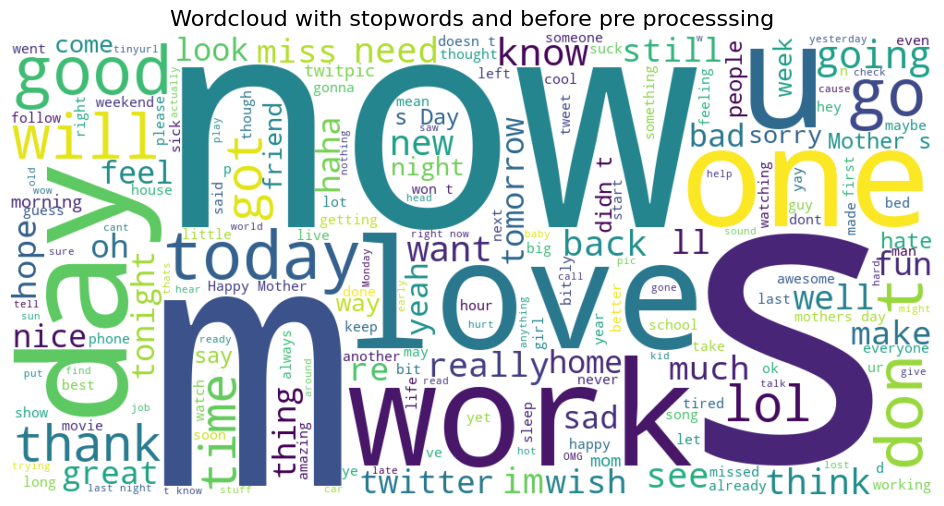

In [13]:
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud


whole_text = ''.join(df['text'].astype(str))

wordcloud = WordCloud(
    background_color='white',
    max_words=200,
    width=1000,
    height=500
).generate(whole_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud with stopwords and before pre processsing', fontsize=16)
plt.show()

## Cleaning more data

### Here we define the stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

custom_words = {

    'usa', 'america', 'minnesota', 'texas', 'florida', 'california', 'ohio', 'georgia', 'illinois', 'newyork',
    'washington', 'oregon', 'nevada', 'arizona', 'michigan', 'indiana', 'colorado', 'wisconsin', 'virginia',
    'maryland', 'pennsylvania', 'tennessee', 'kentucky', 'alabama', 'iowa', 'oklahoma', 'kansas', 'utah',
    'arkansas', 'mississippi', 'louisiana', 'northcarolina', 'southcarolina', 'northdakota', 'southdakota',
    'newmexico', 'newjersey', 'connecticut', 'massachusetts', 'vermont', 'maine', 'delaware', 'alaska', 'hawaii', 
    'san', 'diego',

    'colombia', 'mexico', 'canada', 'argentina', 'chile', 'peru', 'ecuador', 'venezuela', 'brazil', 'spain',
    'france', 'italy', 'germany', 'england', 'uk', 'japan', 'china', 'india', 'russia', 'turkey', 'australia',
    'bogota', 'medellin', 'miami', 'losangeles', 'chicago', 'london', 'paris', 'madrid', 'berlin', 'tokyo',
    'newdelhi', 'beijing', 'seoul', 'sydney', 'barcelona', 'rome', 'amsterdam', 'toronto', 'lisbon', 'dubai',

    'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december',
    'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',

    'people', 'thing', 'someone', 'everyone', 'today', 'tomorrow', 'yesterday',
    'video', 'photo', 'picture', 'account', 'follow', 'retweet', 'reply', 'tweet', 'thread',
    'please', 'thanks', 'thankyou', 'lol', 'omg', 'haha', 'wow', 'yeah', 'okay', 'ok', 'hey',
    'guys', 'girl', 'boy', 'man', 'woman', 'team', 'game', 'season', 'year', 'month', 'day', 'night',
    'news', 'update', 'breaking', 'post', 'share', 'check', 'link', 'page', 'website', 'online',
    'followme', 'followers', 'likes', 'comments', 'bio', 'profile', 'feed', 'story', 'stories',

    'apple', 'samsung', 'google', 'amazon', 'microsoft', 'netflix', 'spotify', 'tiktok', 'youtube', 'instagram',
    'facebook', 'twitter', 'x', 'snapchat', 'linkedin', 'whatsapp', 'telegram', 'discord', 'reddit', 'pinterest',
    'nasa', 'nike', 'adidas', 'coca', 'pepsi', 'tesla', 'uber', 'airbnb', 'zoom',

    'stuff', 'something', 'anything', 'everything', 'somebody', 'anybody', 'nobody',
    'place', 'time', 'moment', 'situation', 'case', 'point', 'example', 'way', 'fact',
    'new', 'old', 'next', 'last', 'another', 'same', 'different', 'few', 'many', 'most', 'more', 'less',
    'every', 'each', 'whole', 'entire', 'lot', 'lots', 'kind', 'type', 'sort',
    'back', 'front', 'side', 'top', 'bottom', 'left', 'right', 'center', 'middle',
    'home', 'work', 'school', 'office', 'class', 'job', 'city', 'country', 'miss',

    'developer', 'engineer', 'programmer', 'designer', 'architect', 'manager', 'director', 'coordinator', 'administrator',
    'supervisor', 'assistant', 'associate', 'consultant', 'intern', 'trainee', 'specialist', 'technician', 'analyst',
    'operator', 'executive', 'ceo', 'cto', 'cfo', 'founder', 'lead', 'senior', 'junior', 'employee', 'worker', 'staff',
    'teacher', 'professor', 'researcher', 'student', 'mentor', 'coach', 'trainer', 'salesperson', 'seller', 'buyer',
    'marketer', 'recruiter', 'hr', 'humanresources', 'accountant', 'lawyer', 'doctor', 'nurse', 'driver', 'chef', 'waiter',
    'bartender', 'cashier', 'security', 'cleaner', 'assistantmanager', 'teamlead', 'productmanager', 'projectmanager',
    'softwareengineer', 'frontenddeveloper', 'backenddeveloper', 'fullstackdeveloper', 'datascientist', 'machinelearning',
    'devops', 'sysadmin', 'qa', 'tester', 'support', 'customer', 'client', 'user', 'agent', 'consulting', 'freelancer', 'boss',

    'wife', 'father', 'mother', 'daughter', 'daughters',
    'brother', 'brothers', 'sister', 'sisters', 'uncle', 'uncles', 'aunt', 'aunts',
    'cousin', 'cousins', 'grandfather', 'grandmother', 'grandparents', 'parents',
    'family', 'families', 'child', 'children', 'baby', 'babies',
    'citizen', 'citizens', 'neighbor', 'neighbors', 'friend', 'friends', 'enemy', 'enemies',
    'guest', 'guests', 'visitor', 'visitors', 'member', 'members', 'participant', 'participants',
    'leader', 'leaders', 'follower', 'followers', 'teammate', 'teammates', 'classmate', 'classmates',
    'worker', 'workers', 'volunteer', 'volunteers', 'student', 'students', 'teacher', 'teachers',
    'professor', 'professors', 'doctor', 'doctors', 'nurse', 'nurses', 'patient', 'patients',
    'officer', 'officers', 'soldier', 'soldiers', 'police', 'judge', 'lawyer', 'attorney', 'attorneys',
    'client', 'clients', 'customer', 'customers', 'user', 'users', 'owner', 'owners',
    'buyer', 'buyers', 'seller', 'sellers', 'artist', 'artists', 'writer', 'writers',
    'actor', 'actors', 'actress', 'actresses', 'singer', 'singers', 'musician', 'musicians',
    'player', 'players', 'coach', 'coaches', 'fan', 'fans', 'supporter', 'supporters',
    'voter', 'voters', 'resident', 'residents',

    'wonder', 'wondered', 'wondering',
    'manage', 'managed', 'managing',
    'handle', 'handled', 'handling',
    'mark', 'marked', 'marking',
    'count', 'counted', 'counting',
    'measure', 'measured', 'measuring',
    'record', 'recorded', 'recording',
    'report', 'reported', 'reporting',
    'notice', 'noticed', 'noticing',
    'reach', 'reached', 'reaching',
    'fit', 'fitted', 'fitting',
    'match', 'matched', 'matching',
    'fill', 'filled', 'filling',
    'pass', 'passed', 'passing',
    'fail', 'failed', 'failing',
    'deliver', 'delivered', 'delivering',
    'receive', 'received', 'receiving',
    'send', 'sent', 'sending',
    'copy', 'copied', 'copying',
    'paste', 'pasted', 'pasting',
    'apply', 'applied', 'applying',
    'compare', 'compared', 'comparing',
    'explain', 'explained', 'explaining',
    'describe', 'described', 'describing',
    'define', 'defined', 'defining',
    'list', 'listed', 'listing',
    'note', 'noted', 'noting',
    'refer', 'referred', 'referring',
    'depend', 'depended', 'depending',
    'relate', 'related', 'relating',
    'connect', 'connected', 'connecting',
    'attach', 'attached', 'attaching',
    'fix', 'fixed', 'fixing',
    'adjust', 'adjusted', 'adjusting',
    'set', 'setting',
    'arrange', 'arranged', 'arranging',
    'organize', 'organized', 'organizing',
    'prepare', 'prepared', 'preparing',
    'plan', 'planned', 'planning',
    'design', 'designed', 'designing',
    'complete', 'completed', 'completing',
    'finish', 'finished', 'finishing',
    'review', 'reviewed', 'reviewing',
    'update', 'updated', 'updating',
    'edit', 'edited', 'editing',
    'save', 'saved', 'saving',
    'load', 'loaded', 'loading',
    'install', 'installed', 'installing',
    'test', 'tested', 'testing',
    'verify', 'verified', 'verifying',
    'confirm', 'confirmed', 'confirming',
    'support', 'supported', 'supporting',
    'control', 'controlled', 'controlling',
    'operate', 'operated', 'operating',
    'perform', 'performed', 'performing',
    'calculate', 'calculated', 'calculating',
    'estimate', 'estimated', 'estimating',
    'analyze', 'analyzed', 'analyzing',
    'evaluate', 'evaluated', 'evaluating',
    'measure', 'measured', 'measuring',
    'assess', 'assessed', 'assessing',
    'improve', 'improved', 'improving',
    'increase', 'increased', 'increasing',
    'decrease', 'decreased', 'decreasing',
    'reduce', 'reduced', 'reducing',
    'maintain', 'maintained', 'maintaining',
    'store', 'stored', 'storing',
    'contain', 'contained', 'containing',
    'include', 'included', 'including',
    'require', 'required', 'requiring',
    'provide', 'provided', 'providing',
    'supply', 'supplied', 'supplying',
    'replace', 'replaced', 'replacing',
    'remove', 'removed', 'removing',
    'clean', 'cleaned', 'cleaning',
    'wash', 'washed', 'washing',
    'dry', 'dried', 'drying',
    'cook', 'cooked', 'cooking',
    'feed', 'fed', 'feeding',
    'wear', 'wore', 'worn', 'wearing',
    'sit', 'sat', 'sitting',
    'stand', 'stood', 'standing',
    'lie', 'lay', 'lain', 'lying',
    'rest', 'rested', 'resting',
    'sleep', 'slept', 'sleeping',
    'wake', 'woke', 'woken', 'waking',
    'watch', 'watched', 'watching',
    'listen', 'listened', 'listening',
    'speak', 'spoke', 'spoken', 'speaking',
    'talk', 'talked', 'talking',
    'read', 'reading',
    'write', 'wrote', 'written', 'writing',
    'print', 'printed', 'printing',
    'draw', 'drew', 'drawn', 'drawing',
    'release', 'releases', 'released',
    'build', 'built', 'building',
    'cut', 'cutting',
    'join', 'joined', 'joining',
    'cover', 'covered', 'covering',
    'drop', 'dropped', 'dropping',
    'learn', 'learnt', 'learned',
    'throw', 'threw', 'thrown', 'throwing',
    'push', 'pushed', 'pushing',
    'pull', 'pulled', 'pulling',

    'wish', 'ive', 'rake', 'make', 'made', 'clear', 'net', 'dont', 'force', 
    'break', 'probably', 'proly', 'already', 'right', 'now', 'https',
    'u', 'd', 'could', 'couldnt', 'would', 'wouldnt', 'come', 'see', 'afford', 'denver',
    'cant', 'buy', 'bought', 'hun', 'care', 'put', 'putted', 'im', 'weekend', 'plugging', 'pluggings'
}


stop_words.update(custom_words)

### Without more spaces / stopwords / mayus / special characters

In [15]:
import unicodedata
import re

def minusAndSpecialCharacteres(df):

    def clean_text(text):
        if isinstance(text, str):
            text = unicodedata.normalize("NFKD", text)
            text = ''.join(ch for ch in text if not unicodedata.combining(ch)) 
            text = ''.join(ch for ch in text if unicodedata.category(ch)[0] != 'C')           
            text = re.sub(r'http\S+', '', text)
            text = re.sub(r'www\S+', '', text)
            text = text.lower()
            text = re.sub(r'[^a-z\s]', '', text)  # special characters and numbers
            text = re.sub(r'\s+', ' ', text)  # if there are more spaces than one, it clears it
            text = text.strip()  # no spaces at the beggining or the end
            text = ' '.join([word for word in text.split() if word not in stop_words]) # Replace stopwords for ' '
        return text

    # Here we ask to the functions that's is inside to change the values in the text column for them that it is supposed to give
    df['text'] = df['text'].apply(clean_text)
    return df

# Use the function that by its self calls the other one to make the changes that we wanna
df = minusAndSpecialCharacteres(df)
df # Actually works as we wait :D

,textID,text,selected_text,sentiment
0,cb774db0d1,id responded going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad,Sooo SAD,negative
2,088c60f138,bullying,bullying me,negative
3,9642c003ef,interview leave alone,leave me alone,negative
4,358bd9e861,sons,"Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,husband lost,d lost,negative
27477,4f4c4fc327,devs lang agile ccnet,", don`t force",negative
27478,f67aae2310,yay good enjoy need hectic take xxxx,Yay good for both of you.,positive
27479,ed167662a5,worth,But it was worth it ****.,positive


## Wordcloud after cleaning data

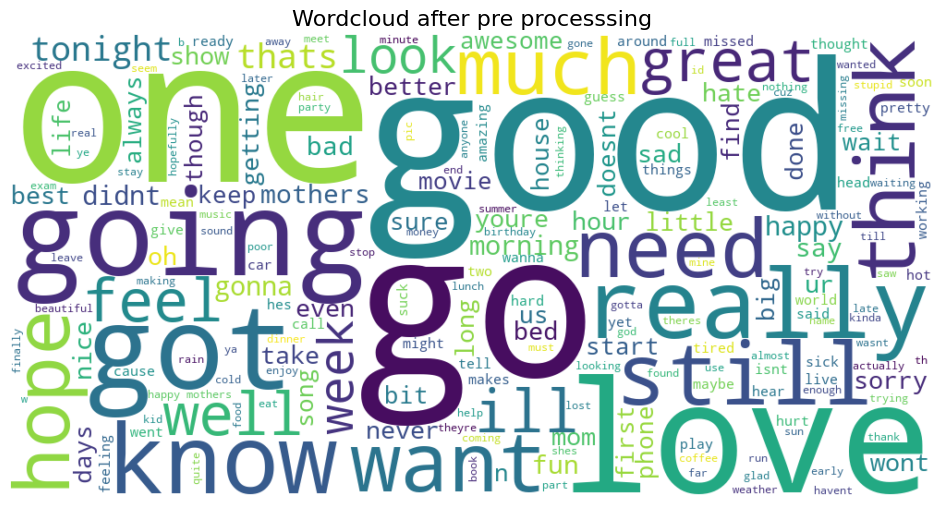

In [16]:
whole_text = ''.join(df['text'].astype(str))

wordcloud = WordCloud(
    background_color='white',
    max_words=200,
    width=1000,
    height=500
).generate(whole_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud after pre processsing', fontsize=16)
plt.show()

## Vectorizer process

### Check if we have df['text'] with 0 characters

In [17]:
# Null values in the text column
null_texts = df['text'].isnull()
print(f"{null_texts.sum()}") # We can continue working with the df, we don't have any text without value

0


### Lenght of strings in our dataset

In [18]:
df['text_length_chars'] = df['text'].str.len() # Lenght of strings for every document

print("Lenght of strings:")
print(f"Min: {df['text_length_chars'].min()}")
print(f"Max: {df['text_length_chars'].max()}")
print(f"Average: {df['text_length_chars'].mean():.2f}")

Lenght of strings:
Min: 0
Max: 123
Average: 33.98


In [19]:
df

,textID,text,selected_text,sentiment,text_length_chars
0,cb774db0d1,id responded going,"I`d have responded, if I were going",neutral,18
1,549e992a42,sooo sad,Sooo SAD,negative,8
2,088c60f138,bullying,bullying me,negative,8
3,9642c003ef,interview leave alone,leave me alone,negative,21
4,358bd9e861,sons,"Sons of ****,",negative,4
...,...,...,...,...,...
27476,4eac33d1c0,husband lost,d lost,negative,12
27477,4f4c4fc327,devs lang agile ccnet,", don`t force",negative,21
27478,f67aae2310,yay good enjoy need hectic take xxxx,Yay good for both of you.,positive,36
27479,ed167662a5,worth,But it was worth it ****.,positive,5


### Total words and unique words

In [20]:
# Lenght of word for every document
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

print("\nStats word count:")
print(df['word_count'].describe())

# Quantile/"Percentil" for maxlen
percentiles = [1, 25, 50, 75, 80, 90, 95, 99, 100]
for p in percentiles:
    value = df['word_count'].quantile(p/100)
    print(f"Quantile {p}%: {value} words") # The x% of tweets has #x of words



Stats word count:
count    27480.000000
mean         5.554330
std          3.239378
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         21.000000
Name: word_count, dtype: float64
Quantile 1%: 0.0 words
Quantile 25%: 3.0 words
Quantile 50%: 5.0 words
Quantile 75%: 8.0 words
Quantile 80%: 8.0 words
Quantile 90%: 10.0 words
Quantile 95%: 11.049999999999272 words
Quantile 99%: 14.0 words
Quantile 100%: 21.0 words


In [21]:
df

,textID,text,selected_text,sentiment,text_length_chars,word_count
0,cb774db0d1,id responded going,"I`d have responded, if I were going",neutral,18,3
1,549e992a42,sooo sad,Sooo SAD,negative,8,2
2,088c60f138,bullying,bullying me,negative,8,1
3,9642c003ef,interview leave alone,leave me alone,negative,21,3
4,358bd9e861,sons,"Sons of ****,",negative,4,1
...,...,...,...,...,...,...
27476,4eac33d1c0,husband lost,d lost,negative,12,2
27477,4f4c4fc327,devs lang agile ccnet,", don`t force",negative,21,4
27478,f67aae2310,yay good enjoy need hectic take xxxx,Yay good for both of you.,positive,36,7
27479,ed167662a5,worth,But it was worth it ****.,positive,5,1


In [22]:
# We take all the words and see those unique ones
all_words = []
for text in df['text']:
    words = str(text).split()  # Split for add any word into the list of all_words
    all_words.extend(words)

# Unique words calc
unique_words = set(all_words) # set just put those unique words
total_unique_words = len(unique_words) # Give us our number of unique words

print(f"Unique words: {total_unique_words}")
print(f"Total words: {len(all_words)}")

Unique words: 25956
Total words: 152633


### A couple of words that appear only 1 time

In [23]:
unique_words

{'keyboard',
 'babyblue',
 'nowww',
 'gotham',
 'hollie',
 'kahuna',
 'smokefree',
 'port',
 'bestiesminus',
 'dora',
 'tracking',
 'spits',
 'arrived',
 'proppa',
 'capitan',
 'tainted',
 'bobbys',
 'killeen',
 'xxxxxxx',
 'paulevans',
 'semester',
 'history',
 'likeslol',
 'lolz',
 'againreally',
 'ritualistic',
 'york',
 'ie',
 'mcdo',
 'skipping',
 'miscarriage',
 'okc',
 'livelovesing',
 'expand',
 'services',
 'overcast',
 'pacing',
 'wrestling',
 'fedex',
 'hubbie',
 'amazinq',
 'shake',
 'friendand',
 'streamline',
 'bi',
 'needlearn',
 'mommas',
 'blumenthal',
 'asthma',
 'nth',
 'roads',
 'accadentally',
 'quasisequel',
 'embrace',
 'promising',
 'rawr',
 'musicnews',
 'educate',
 'fotos',
 'rica',
 'salads',
 'nighty',
 'westin',
 'hamburger',
 'earbuds',
 'wantan',
 'spongebobs',
 'dodging',
 'tdl',
 'funnnn',
 'cumbersome',
 'deadliestcatch',
 'todayhowever',
 'averaged',
 'poughkeepsie',
 'pleaseeeeee',
 'ughhhhhhhh',
 'bullet',
 'mackillop',
 'mar',
 'spirit',
 'facial',

In [24]:
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(f"Initial texts: {len(df)}")

# Count word frequency in entire corpus
word_counts = Counter()
for text in df['text']:
    if isinstance(text, str):
        word_counts.update(text.split())

# Keep only words that appear 2+ times
valid_words = {word for word, count in word_counts.items() if count > 1}

print(f"Unique words removed: {len(word_counts) - len(valid_words)}")
print(f"Valid words (2+ occurrences): {len(valid_words)}")

# Filter texts keeping only valid words
def filter_unique_words(text):
    if not isinstance(text, str):
        return ""
    return ' '.join([w for w in text.split() if w in valid_words])

df['text'] = df['text'].apply(filter_unique_words)

# Remove rows with empty text
initial_rows = len(df)
df = df[df['text'].str.strip() != ""].reset_index(drop=True)
removed_rows = initial_rows - len(df)

print(f"Rows removed (empty text): {removed_rows}")
print(f"Final documents: {len(df)}")

# Create tokenizer and generate sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Calculate max length (95th percentile)
sequence_lengths = [len(seq) for seq in sequences]

maxlen = int(pd.Series(sequence_lengths).quantile(0.95))
maxlen

print(f"\nMax length (95th percentile): {maxlen}")
print(f"Average length: {sum(sequence_lengths) / len(sequence_lengths):.1f}")
print(f"Min length: {min(sequence_lengths)}")
print(f"Max length: {max(sequence_lengths)}")

# Apply padding
padded_sequences = pad_sequences(
    sequences,
    maxlen=maxlen,
    padding='post',
    truncating='post'
)

Initial texts: 27480
Unique words removed: 16604
Valid words (2+ occurrences): 9352
Rows removed (empty text): 678
Final documents: 26802

Max length (95th percentile): 10
Average length: 5.1
Min length: 1
Max length: 18


In [25]:
df

,textID,text,selected_text,sentiment,text_length_chars,word_count
0,cb774db0d1,id going,"I`d have responded, if I were going",neutral,18,3
1,549e992a42,sooo sad,Sooo SAD,negative,8,2
2,9642c003ef,interview leave alone,leave me alone,negative,21,3
3,358bd9e861,sons,"Sons of ****,",negative,4,1
4,28b57f3990,best rangers forum earth,http://www.dothebouncy.com/smf - some shameles...,neutral,34,5
...,...,...,...,...,...,...
26797,4eac33d1c0,husband lost,d lost,negative,12,2
26798,4f4c4fc327,devs lang agile,", don`t force",negative,21,4
26799,f67aae2310,yay good enjoy need hectic take xxxx,Yay good for both of you.,positive,36,7
26800,ed167662a5,worth,But it was worth it ****.,positive,5,1


#### Verification of the functionality of sequences

In [26]:
sequences

[[130, 7],
 [221, 29],
 [801, 167, 284],
 [2248],
 [46, 4687, 2506, 958],
 [26, 1769],
 [349, 334],
 [1770, 1907, 2826, 323, 959],
 [19, 6, 2507, 2827, 3254, 6211, 316, 51, 33, 3, 452],
 [12, 12, 4, 128, 6, 775, 1908],
 [299, 652, 4688],
 [15, 5, 155, 32, 140, 776],
 [3829],
 [1294, 18, 2249],
 [79, 3830, 6212, 380],
 [68, 398, 41, 2828, 156, 90, 6213, 31, 1216, 63],
 [33, 10],
 [121],
 [18, 28, 21, 78, 50],
 [199, 2075, 12, 406, 558, 1636, 960, 42, 2829, 1636],
 [77, 6214, 117],
 [146, 6215, 306, 86, 271, 362, 183, 1909],
 [961, 164, 394, 285, 865, 996],
 [208, 634, 436, 26, 1295],
 [28],
 [263, 923, 1158],
 [2250, 236, 6216, 4689, 26, 122, 777],
 [83, 735, 6217, 735, 55],
 [7, 212],
 [21, 6218, 2508, 1039, 6218],
 [4690, 8, 223, 219, 13, 19, 2251, 266],
 [24, 182, 195, 207],
 [548, 33, 108, 46, 37, 21, 123, 2252],
 [24, 183, 1518, 4691, 1362, 1771, 1363, 1089],
 [1217, 3831, 736, 507, 398, 224, 17, 831],
 [12, 248, 141, 1519, 1439, 3255, 558, 241, 3832],
 [1440],
 [49, 9, 572, 6219, 

#### Verification of the functionality of padded_sequences

In [27]:
padded_sequences

array([[ 130,    7,    0, ...,    0,    0,    0],
       [ 221,   29,    0, ...,    0,    0,    0],
       [ 801,  167,  284, ...,    0,    0,    0],
       ...,
       [  84,    2,  165, ...,    0,    0,    0],
       [ 439,    0,    0, ...,    0,    0,    0],
       [5475,    7, 1769, ...,    0,    0,    0]],
      shape=(26802, 10), dtype=int32)

In [28]:
# We define parameters to choose the expected result : df['sentiment'] in our case

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
class_names = label_encoder.classes_

## Model and training

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

print("Training process")

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
class_names = label_encoder.classes_

print("Class distribution:")
for i, class_name in enumerate(class_names):
    count = np.sum(y == i)
    print(f"  {class_name}: {count} tweets ({count/len(y)*100:.1f}%)")

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nData split:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel summary:")
model.summary()

print("\nTraining simple model...")

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=256,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

print("Training completed")

print("\nEvaluating model...")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nClassification report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

print("\nConfusion matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

print("\nAccuracy per class:")
for i, class_name in enumerate(class_names):
    mask = y_test == i
    if np.sum(mask) > 0:
        class_acc = accuracy_score(y_test[mask], y_pred_classes[mask])
        print(f"  {class_name}: {class_acc:.4f} ({class_acc*100:.2f}%)")

if accuracy >= 0.80:
    print(f"\nObjective achieved! Accuracy >= 80%")
else:
    print(f"\nObjective not reached. Accuracy < 80%")
    print(f"\nNote: Maximum achievable with this data may be around {accuracy*100:.1f}%")
    print("Consider improving data cleaning or getting more/better quality data")

print("\nProcess completed!")

Training process
Class distribution:
  negative: 7689 tweets (28.7%)
  neutral: 10638 tweets (39.7%)
  positive: 8475 tweets (31.6%)

Data split:
  X_train: (21441, 10)
  X_test: (5361, 10)

Model summary:


c:\Users\Camilo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training simple model...
Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4435 - loss: 1.0703 - val_accuracy: 0.5976 - val_loss: 0.9945
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5917 - loss: 0.8809 - val_accuracy: 0.6517 - val_loss: 0.8192
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6841 - loss: 0.7398 - val_accuracy: 0.6723 - val_loss: 0.7728
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7405 - loss: 0.6607 - val_accuracy: 0.6581 - val_loss: 0.7866
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7718 - loss: 0.6041 - val_accuracy: 0.6693 - val_loss: 0.7898
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7980 - loss: 0.5573 - val_accuracy: 0.6583 - val_loss: 0.8239
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8166 - loss: 0.5135 - val_accuracy: 0.6486 - val_loss: 0.8832
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8300 - loss: 0.4872 - val_ac

## Accuracy


Confusion Matrix (Combined):


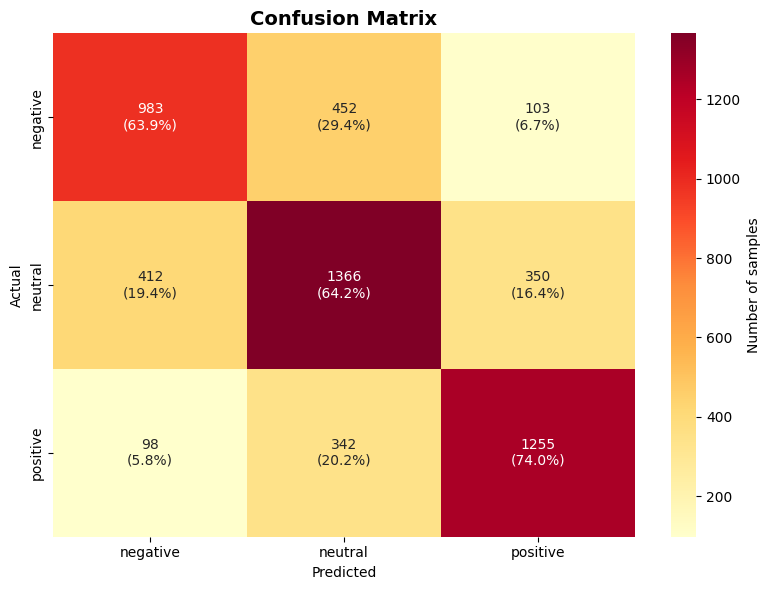

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate confusion matrix with both counts and percentages
def plot_confusion_matrix_combined(y_true, y_pred, class_names, title="Confusion Matrix"):

    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.figure(figsize=(8, 6))
    annotations = []
    for i in range(len(cm)):
        row = []
        for j in range(len(cm)):
            row.append(f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)")
        annotations.append(row)
    
    sns.heatmap(cm, 
                annot=annotations, 
                fmt='', 
                cmap='YlOrRd', 
                xticklabels=class_names, 
                yticklabels=class_names,
                cbar_kws={'label': 'Number of samples'})
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Combined confusion matrix
print("\nConfusion Matrix (Combined):")
plot_confusion_matrix_combined(y_test, y_pred_classes, class_names)


### Most used word in tweets

In [31]:
def mostusedword(df):
    # Every text in a new string
    total_text = ' '.join(df['text'].astype(str))
    
    # words split
    words = total_text.split()
    
    # Counter of our words
    cnter = Counter(words)
    
    # Get the most used word and its frequency
    word_most, frequency = cnter.most_common(1)[0]
    
    return word_most, frequency

word_most, frequency = mostusedword(df)
print(f"The word most used it's '{word_most}' with {frequency} on the whole document.")

The word most used it's 'good' with 1549 on the whole document.
